In [9]:
import train
import numpy as np

In [6]:
# test with 4-feature methods
from sklearn.externals import joblib
X, Y = joblib.load('12feat.fzy')
Y = Y.reshape(Y.shape[0],)

In [33]:
print(np.any(np.isnan(X)))
X = np.nan_to_num(X)
print(np.all(np.isfinite(X)))

False
True


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=1024, shuffle=True)

start training...
saving model...
done
Normalized confusion matrix
[[ 0.87356322  0.12643678]
 [ 0.22944551  0.77055449]]


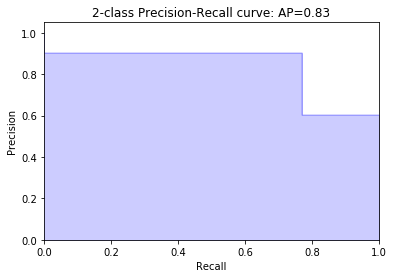

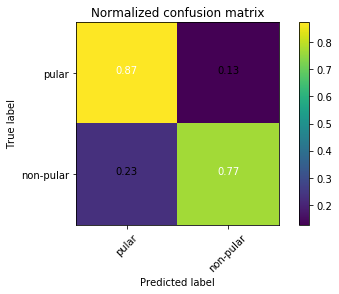

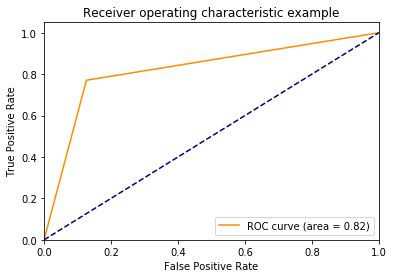

accuracy: 0.811710677382
f1: 0.830927835052
precision: [ 0.60045924  0.901566    1.        ]
recall: [ 1.          0.77055449  0.        ]


In [36]:
from sklearn.svm import SVC
train.train(X_train, y_train, SVC(), 'SVC')
train.test(X_test, y_test, 'SVC')

start training...
saving model...
done
Normalized confusion matrix
[[ 0.93390805  0.06609195]
 [ 0.06500956  0.93499044]]


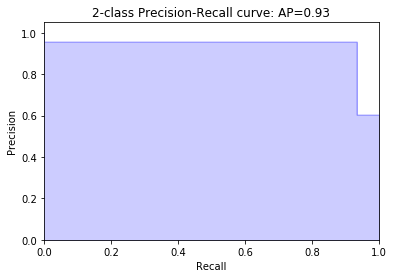

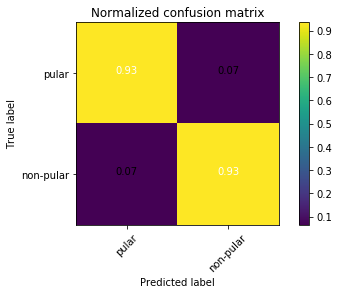

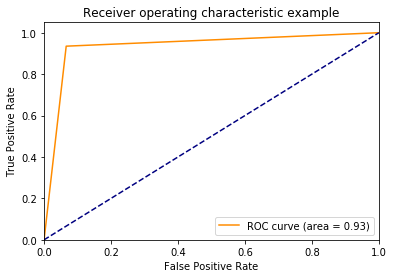

accuracy: 0.934557979334
f1: 0.944927536232
precision: [ 0.60045924  0.95507812  1.        ]
recall: [ 1.          0.93499044  0.        ]


In [37]:
from sklearn.ensemble import RandomForestClassifier
train.train(X_train, y_train, RandomForestClassifier(n_estimators=10), 'RandomForest')
train.test(X_test, y_test, 'RandomForest')

start training...
saving model...
done
Normalized confusion matrix
[[ 0.88505747  0.11494253]
 [ 0.06692161  0.93307839]]


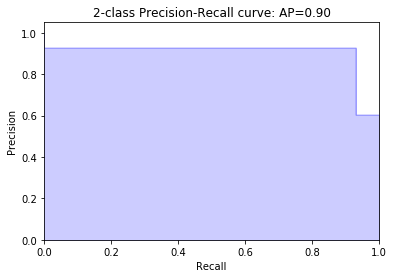

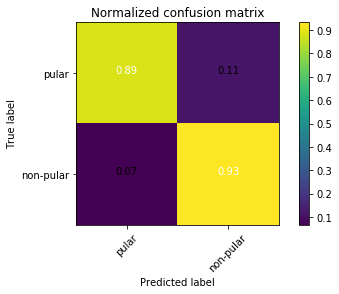

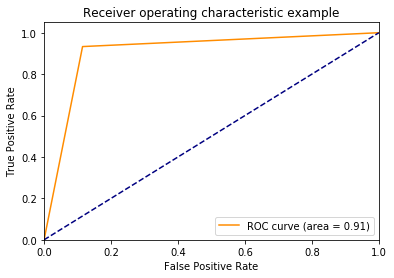

accuracy: 0.913892078071
f1: 0.928639391056
precision: [ 0.60045924  0.92424242  1.        ]
recall: [ 1.          0.93307839  0.        ]


In [54]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=2048)
train.train(X_train, y_train, clf, 'GradientBoosting')
train.test(X_test, y_test, 'GradientBoosting')

start training...
saving model...
done
Normalized confusion matrix
[[ 0.90229885  0.09770115]
 [ 0.07265774  0.92734226]]


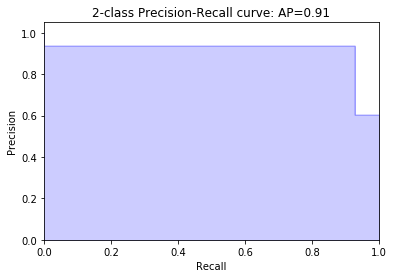

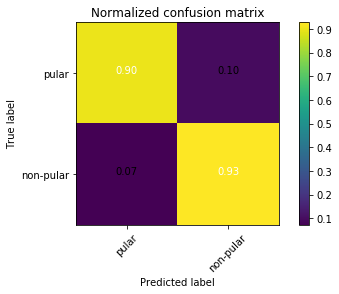

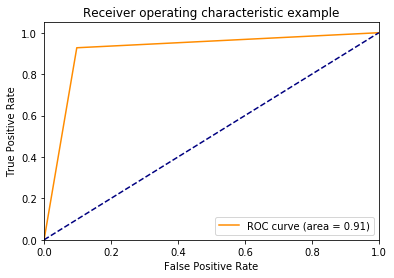

accuracy: 0.917336394948
f1: 0.930902111324
precision: [ 0.60045924  0.9344894   1.        ]
recall: [ 1.          0.92734226  0.        ]


In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME", n_estimators=200)
train.train(X_train, y_train, bdt, 'AdaBoost')
train.test(X_test, y_test, 'AdaBoost')

start training...
saving model...
done
Normalized confusion matrix
[[ 0.51724138  0.48275862]
 [ 0.27151052  0.72848948]]


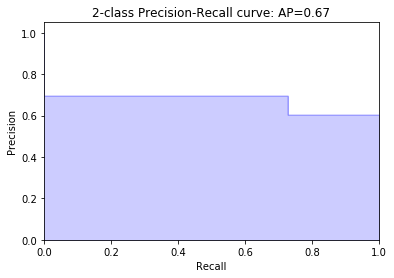

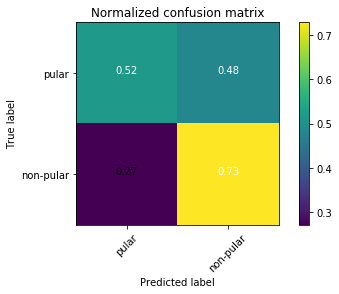

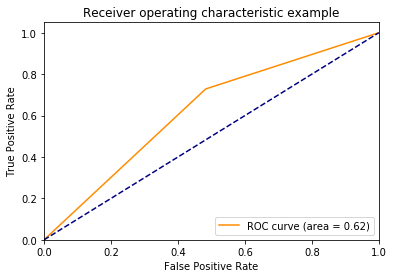

accuracy: 0.644087256028
f1: 0.710820895522
precision: [ 0.60045924  0.69398907  1.        ]
recall: [ 1.          0.72848948  0.        ]


In [53]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50, 40, 30, 20), random_state=1024)
train.train(X_train, y_train, mlpc, 'MLP')
train.test(X_test, y_test, 'MLP')